In [39]:
import pandas as pd

full = pd.read_csv("../../data/poptrag_lyrics_genres_corpus_filtered_english.csv")
full.info()

<class 'pandas.DataFrame'>
RangeIndex: 111938 entries, 0 to 111937
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                111938 non-null  int64  
 1   track.s.id                111938 non-null  str    
 2   track.s.title             111937 non-null  str    
 3   track.s.firstartist.name  111938 non-null  str    
 4   album.s.title             111938 non-null  str    
 5   album.s.releaseyear       111938 non-null  int64  
 6   track.s.popularity        111938 non-null  int64  
 7   track.language            111938 non-null  str    
 8   full_lyrics               111938 non-null  str    
 9   cat5                      111938 non-null  str    
 10  pmax5                     111938 non-null  float64
 11  nmax5                     111938 non-null  float64
 12  cat12                     111938 non-null  str    
 13  pmax12                    111938 non-null  float64
 14 

In [40]:
from helpers.LyricsClassficationExperiment import LyricsClassificationExperiment

cat5_exp = LyricsClassificationExperiment(
    corpus=full, 
    genrecol="cat5",
    lyricscol="full_lyrics", 
    artistcol="track.s.firstartist.name", 
    output_dir="cat5_mock_experiment",
    test_size=0.2,
    random_state=42, 
    subsample_debug=0.05,
)
print(cat5_exp)

LyricsClassificationExperiment with 5 genres
Train size: 4480 samples
Test size: 1116 samples
Features not yet computed.
Model not yet trained.
Output directory: cat5_mock_experiment



In [41]:
cat5_exp.compute_fs_ngram_features(min_artists=50, top_n = 100)

✓ Extracted unigrams:
  - Unique: 22,112
  - Shape: (4480, 22112)
  - Examples: ['wail', 'coban', 'answer', 'hinting', "give'm"]
✓ Extracted bigrams:
  - Unique: 199,736
  - Shape: (4480, 199736)
  - Examples: ['these hands', 'cannot penetrate', 'all tomorrow', 'yeah woo', 'head we']
✓ Extracted trigrams:
  - Unique: 421,421
  - Shape: (4480, 421421)
  - Examples: ['the streets now', 'buy you much', "ain't no commercial", 'when you follow', 'highway where you']
Calculating genre-level TF-IDF for unigrams with genre ...
✓ Calculated TF-IDF for 40,596 genre-ngram pairs
Calculating genre-level TF-IDF for bigrams with genre ...
✓ Calculated TF-IDF for 260,266 genre-ngram pairs
Calculating genre-level TF-IDF for trigrams with genre ...
✓ Calculated TF-IDF for 462,078 genre-ngram pairs
Counting artists per n-gram...


100%|██████████| 22112/22112 [00:03<00:00, 7072.08it/s]


✓ Calculated artist diversity for 22,112 n-grams
Counting artists per n-gram...


100%|██████████| 199736/199736 [00:28<00:00, 7127.13it/s]


✓ Calculated artist diversity for 199,736 n-grams
Counting artists per n-gram...


100%|██████████| 421421/421421 [00:58<00:00, 7187.51it/s]


✓ Calculated artist diversity for 421,421 n-grams
Total unique n-grams: 401


In [42]:
print(cat5_exp)
# cat5_exp.show_train_test_genrefreq_comparison()
cat5_exp.X_train.shape[1] == cat5_exp.X_test.shape[1]
# cat5_exp.X_test

cat5_exp.y_train

LyricsClassificationExperiment with 5 genres
Train size: 4480 samples
Test size: 1116 samples
# of features: 401
Feature type: Fell-Spohrleder (2014) N-grams (top 100, min. 50 artists)
Model not yet trained.
Output directory: cat5_mock_experiment



0             rock
1              pop
2       electronic
3             rock
4              pop
           ...    
4475           pop
4476          rock
4477           pop
4478         metal
4479          rock
Name: genre, Length: 4480, dtype: str

In [43]:
import numpy as np

param_space = {
    "C": [-3, 2],
    "l1_ratio": [0, 1],
    "target_ratio": [np.log10(1), np.log10(5)],
}  # C and target_ratio in log scale 
cat5_exp.tune_and_train_logistic_regression(
    param_space, cv=2, n_initial=3, n_iterations=2, n_jobs=6
)

Starting Initial Phase:
Using 6 parallel jobs
Initial evaluation 1/3
Score: 0.2886 ± 0.0038
------------------------------------------------------------
Initial evaluation 2/3
Score: 0.3354 ± 0.0035
------------------------------------------------------------
Initial evaluation 3/3
Score: 0.3931 ± 0.0042
------------------------------------------------------------
Starting Bayesian Phase:
Bayesian iteration 1/2
Score: 0.3693 ± 0.0040
------------------------------------------------------------
Bayesian iteration 2/2
Score: 0.3484 ± 0.0003
------------------------------------------------------------
Selecting best parameters according to 1-SE rule...
Retraining best pipeline on full training data...


N:\Materialien\Promotion\LyricsGenreRecognition\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
N:\Materialien\Promotion\LyricsGenreRecognition\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


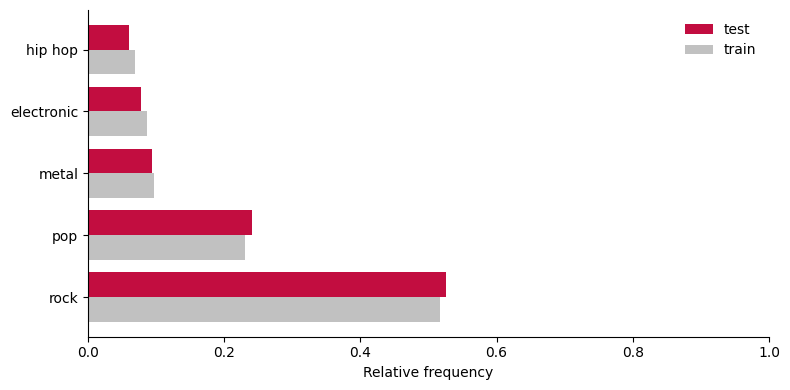

In [44]:
cat5_exp.show_train_test_genrefreq_comparison()

In [45]:
cat5_exp.show_random_baseline_evaluation()

F1 macro: 0.176
Precision macro: 0.177
Recall macro: 0.177
Cohen's kappa: -0.023


In [46]:
cat5_exp.show_tuning_history()

Selected model parameters:
  C: 5.388
  l1_ratio: 0.405
  target_ratio: 4.668
   iteration  score_mean  score_se          C  l1_ratio  target_ratio
0          0    0.288626  0.003795   0.002381  0.187041      1.844740
1          0    0.335385  0.003501   0.148270  0.968608      1.013164
2          0    0.393129  0.004157   5.388077  0.404645      4.667892
3          1    0.369307  0.003994  60.441284  0.669646      2.113748
4          2    0.348430  0.000287  97.529703  0.275267      1.448099


In [47]:
cat5_exp.show_model_evaluation()
type(cat5_exp.model)

Selected model parameters:
  C: 5.388
  l1_ratio: 0.405
  target_ratio: 4.668
              precision    recall  f1-score   support

  electronic       0.12      0.07      0.09        87
     hip hop       0.44      0.56      0.49        68
       metal       0.37      0.40      0.38       105
         pop       0.42      0.29      0.35       269
        rock       0.60      0.69      0.64       587

    accuracy                           0.51      1116
   macro avg       0.39      0.40      0.39      1116
weighted avg       0.49      0.51      0.49      1116



imblearn.pipeline.Pipeline

In [ ]:
cat5_exp.save_experiment()
test = pickle.load(open("cat5_mock_experiment/complete_experiment.pkl", "rb"))

FileNotFoundError: [Errno 2] No such file or directory: 'cat5_mock_experiment/experiment.pkl'